# Exercise 1:  Flip a coin times

In [3]:
import random

N = 10
s = 0
for i in range(N):
    r = random.randint(0, 1)
    print("Heads" if r else "Tails")
    s += r
print("%d times Heads!" % s)

Tails
Heads
Tails
Heads
Heads
Heads
Tails
Tails
Tails
Heads
5 times Heads!


# Exercise 8.2: Compute a probability

In [13]:
for N in [1e1, 1e2, 1e3, 1e6]:
    M = sum(0.5 <= random.random() < 0.6 for i in range(int(N)))
    p = M / N
    print(f"N = {N:4.0e}: p = {p:f}")

N = 1e+01: p = 0.200000
N = 1e+02: p = 0.080000
N = 1e+03: p = 0.098000
N = 1e+06: p = 0.100152


# Exercise 8.3: Choose random colors

In [14]:
colours = ['red', 'green', 'blue', 'yellow', 'orange', 'purple', 'black', 'white']
print(random.choice(colours))

purple


# Exercise 8.4: Exercise 8.4: Draw balls from a hat

In [31]:
# Monte Carlo Time!
import numpy as np
hat = 10*['red'] + 10*['blue'] + 10*['yellow'] + 10*['purple']
N = 100000
M = 0
for _ in range(100000):
    draw = [random.choice(hat) for _ in range(10)]
    success = draw.count('blue') == 2 and draw.count('purple') == 2
    M += success
p = M / N
print(f"The probability is approximately {100*p}%")

The probability is approximately 7.636%


# Exercise 8.5: Computing probabilities of rolling dice

In [32]:
# 1: 1/6
# 2: (1/6)^4
# 3: 1/6
# 4: 100% (obviously, the die is biased)

In [37]:
N = 100000
M = 0
for _ in range(N):
    M += random.randint(1, 6) == 6
print(M/N)
print(1/6)

0.16603
0.16666666666666666


In [38]:
N = 100000
M = 0
for i in range(N):
    s = 0
    for ii in range(4):
        s += random.randint(1, 6) == 6
    M += s == 4
print(M/N)
print((1/6)**4)

0.00078
0.0007716049382716048


In [39]:
s = 0
while s < 3:
    s += random.randint(1, 6) == 6
N = 100000
M = 0
for _ in range(N):
    M += random.randint(1, 6) == 6
print(M/N)
print(1/6)

0.16854
0.16666666666666666


# Exercise 8.6: Estimate the probability in a dice game

In [52]:
print("    n |   p [%] ")
print("------+---------")
N = 100000
for n in [1, 2, 10, 100, 1000]:
    M = 0
    for i in range(N):
        for ii in range(n):
            if random.randint(1, 6) == 6:
                M += 1
                break
    print(f" {n:4} | {100*M/N:7.3f} ")

    n |   p [%] 
------+---------
    1 |  16.459 
    2 |  30.495 
   10 |  83.841 
  100 | 100.000 
 1000 | 100.000 


In [53]:
100*11/36    # close enough.

30.555555555555557

# Exercise 8.7: Compute the probability of hands of cards

In [23]:
import random

class Deck(object):    
    def __init__(self):
        ranks = ["A", "2", "3", "4", "5", "6", "7",
                 "8", "9", "10", "J", "Q", "K"]
        suits = ["C", "D", "H", "S"]
        self.deck = [s+r for s in suits for r in ranks]
        random.shuffle(self.deck)
        
    def hand(self, n=1):
        """Deal n cards. Return hand as list."""
        hand = [self.deck[i] for i in range(n)] # pick cards
        del self.deck[:n] # remove cards
        return hand

    def deal(self, cards_per_hand, no_of_players):
        """Deal no_of_players hands. Return list of lists."""
        return [self.hand(cards_per_hand) for i in range(no_of_players)]
    
    def putback(self, card):
        """Put back a card under the rest."""
        self.deck.append(card)
    
    def __str__(self):
        return str(self.deck)
    
    
def same_rank(hand, n_of_a_kind):
    ranks = [card[1:] for card in hand]
    counter = 0
    already_counted = []
    for rank in ranks:
        if rank not in already_counted and ranks.count(rank) == n_of_a_kind:
            counter += 1
            already_counted.append(rank)
    return counter


def same_suit(hand):
    suits = [card[0] for card in hand]
    counter = {}   # counter[suit] = how many cards of suit
    for suit in suits:
        count = suits.count(suit)
        if count > 1:
            counter[suit] = count
    return counter

In [37]:
# two pairs among five cards
N = 10000
M = 0
for i in range(N):
    h = Deck().hand(5)
    M += same_rank(h, 2) == 2
p = M / N
print(f"The probability of receiving exactly two pairs among five cards is approximately {100*p}%")

The probability of receiving exactly two pairs among five cards is approximately 4.77%


In [40]:
# >= 4 cards of same suit among 5 cards
N = 10000
M = 0
for i in range(N):
    h = Deck().hand(5)
    M += list(same_suit(h).values())[0] >= 4
p = M / N
print(f"The probability of receiving four or five cards of the same suit among five cards is approximately {100*p}%")

The probability of receiving four or five cards of the same suit among five cards is approximately 4.78%


In [42]:
# four-of-a-kind among 5 cards
N = 10000
M = 0
for i in range(N):
    h = Deck().hand(5)
    M += same_rank(h, 4)
p = M / N
print(f"The probability of receiving four-of-a-kind among five cards is approximately {100*p}%")

The probability of receiving four-of-a-kind among five cards is approximately 0.03%


# Exercise 8.8: Decide if a dice game is fair

In [44]:
N = 10000
money = 0
for i in range(N):
    money -= 1
    money += 10 * (sum(random.randint(1, 6) for i in range(4)) < 9)
print(f"After {N} rounds your capital is: {money}")

After 10000 rounds your capital is: -4870


# Exercise 8.9: Adjust a game to make it fair

In [12]:
def probability_less_eyes(n_dice, n_eyes):
    N = 100000
    M = 0
    for i in range(N):
        M += sum(random.randint(1, 6) for i in range(n_dice)) < n_eyes
    return M / N

def probability_less_eyes2(n, s):
    from scipy.special import comb
    p = comb(s-1, s-1-n) / 6**n
    return p if p <= 1 else 1

In [9]:
probability_less_eyes(4, 9)

0.05359

In [8]:
probability_less_eyes2(4, 9)

0.05401234567901234

In [10]:
# on average, you should lose / gain no money in a round.
# => r * probability_less_eyes(4, 9) = 1
r = 1 / probability_less_eyes2(4, 9)
r

18.514285714285716

In [112]:
# play again:
N = 10000
money = 0
for i in range(N):
    money -= 1
    money += r * (sum(random.randint(1, 6) for i in range(4)) < 9)
print(f"After {N} rounds your capital is: {money} (average gain per round: {money / N})")

After 10000 rounds your capital is: -161.2513251622765 (average gain per round: -0.016125132516227648)


# Exercise 8.10: Make a test function for Monte Carlo simulation

In [15]:
import numpy as np

def test_probability_less_eyes():
    # impossibilities
    assert probability_less_eyes2(4, 1) == 0
    assert probability_less_eyes2(3, 3) == 0
    
    # necessities
    assert probability_less_eyes2(1, 7) == 1
    assert probability_less_eyes2(2, 13) == 1
    
    # n = 2, s in [3, 4, 5, 6]
    # hand-calculations: p in [1/36, 3/36, 6/36, 10/36]
    hand = [1/36, 3/36, 6/36, 10/36]
    random.seed(42)
    computed = [probability_less_eyes2(2, s) for s in [3, 4, 5, 6]]
    assert np.allclose(hand, computed, atol=1e-6)
    
test_probability_less_eyes()

# Exercise 8.11: Generalize a game

In [42]:
from collections import defaultdict

def probability():
    N = 1000000
    M = defaultdict(int)
    
    for _ in range(N):
        throws = 2
        previous = random.randint(1, 6)
        eyes = random.randint(1, 6)
        while previous < eyes:
            previous = eyes
            eyes = random.randint(1, 6)
            throws += 1
        M[throws] += 1
    
    p = {m: hits / N for m, hits in M.items()}
    p[7] = 1 / 6**6
    
    return p

probability()

{2: 0.583427,
 3: 0.324621,
 4: 0.080498,
 5: 0.010693,
 6: 0.000744,
 7: 2.143347050754458e-05}

In [50]:
# s = 0
# while True:
#    s -= 1
#    if play_success(m):
#        s += r
# => r*p(m) = 1
# => r_m = 1 / p(m)

print("Rewards:")
p = probability()
for m in [2, 3, 4, 5, 6, 7]:
    print(f"m = {m}: r = {1 / p[m]:8.2f}€")

Rewards:
m = 2: r =     1.72€
m = 3: r =     3.08€
m = 4: r =    12.32€
m = 5: r =    92.07€
m = 6: r =  1377.41€
m = 7: r = 46656.00€


# Exercise 8.12: Compare two playing strategies

In [72]:
def play(nrounds, ndice=2):
    player = Player("YOU", nrounds, player_guess, ndice)
    computer = Player("Computer", nrounds, computer_guess, ndice)
    
    for i in range(nrounds):
        player.play_one_round()
        computer.play_one_round()
    
    return(player.wins, computer.wins)
    
    
class Player(object):
    def __init__(self, name, capital, guess_function, ndice):
        self.name = name
        self.wins = 0
        self.capital = capital
        self.guess_function = guess_function
        self.ndice = ndice
        
    def play_one_round(self):
        self.guess = self.guess_function(self.ndice)
        self.throw = sum(random.randint(1, 6) for i in range(self.ndice))
        if self.guess == self.throw:
            self.capital += self.guess
            self.wins += 1
        else:
            self.capital -= 1
        
def computer_guess(ndice):
    return random.randint(ndice, 6*ndice)

def player_guess(ndice):
    return int(ndice*3.5)

In [73]:
print("The player won %d times, the computer %d times." % play(10000))

The player won 1614 times, the computer 881 times.


# Exercise 8.13: Investigate strategies in a game

In [82]:
ndice = {}
for i in range(2, 21):
    p, c = play(50000, ndice=i)
    ndice[i] = p / c
print(f"Best number of dice: %d" % max(ndice, key= lambda k: ndice[k]))

Best number of dice: 20


# Exercise 8.14: Investigate the winning chances of some games

In [85]:
N = 10000
M = {n: defaultdict(int) for n in range(4, 11)}
hat = 5*['red'] + 5*['yellow'] + 3*['green'] + 7*['brown']
for _ in range(N):
    for n in range(4, 11):
        h = hat[:]
        hand = []
        for i in range(n):
            x = random.choice(h)
            h.remove(x)
            hand.append(x)
        M[n][1] += hand.count('red') == 3
        M[n][2] += hand.count('brown') >= 3
        M[n][3] += hand.count('yellow') == 1 and hand.count('brown') == 1
        M[n][4] += {'red', 'yellow', 'green', 'brown'} <= set(hand)

from pprint import pprint
pprint(M)

{4: defaultdict(<class 'int'>, {1: 322, 2: 1025, 3: 2003, 4: 1082}),
 5: defaultdict(<class 'int'>, {1: 699, 2: 2098, 3: 1299, 4: 2768}),
 6: defaultdict(<class 'int'>, {1: 1165, 2: 3357, 3: 626, 4: 4347}),
 7: defaultdict(<class 'int'>, {1: 1741, 2: 4765, 3: 246, 4: 5842}),
 8: defaultdict(<class 'int'>, {1: 2455, 2: 6044, 3: 86, 4: 7045}),
 9: defaultdict(<class 'int'>, {1: 2973, 2: 7319, 3: 13, 4: 7897}),
 10: defaultdict(<class 'int'>, {1: 3388, 2: 8280, 3: 4, 4: 8668})}


In [88]:
p = {n: {s: h / N for s, h in v.items()} for n, v in M.items()}
p

{4: {1: 0.0322, 2: 0.1025, 3: 0.2003, 4: 0.1082},
 5: {1: 0.0699, 2: 0.2098, 3: 0.1299, 4: 0.2768},
 6: {1: 0.1165, 2: 0.3357, 3: 0.0626, 4: 0.4347},
 7: {1: 0.1741, 2: 0.4765, 3: 0.0246, 4: 0.5842},
 8: {1: 0.2455, 2: 0.6044, 3: 0.0086, 4: 0.7045},
 9: {1: 0.2973, 2: 0.7319, 3: 0.0013, 4: 0.7897},
 10: {1: 0.3388, 2: 0.828, 3: 0.0004, 4: 0.8668}}

In [95]:
from math import sqrt
r = {n: {1: 60 * p[1] - 2*n, 2: 7 + 5*sqrt(n) - 2*n, 3: n**3 - 26 - 2*n, 4: 23 - 2*n} for n, p in p.items()}
r

{4: {1: -6.068, 2: 9.0, 3: 30, 4: 15},
 5: {1: -5.806, 2: 8.180339887498949, 3: 89, 4: 13},
 6: {1: -5.01, 2: 7.24744871391589, 3: 178, 4: 11},
 7: {1: -3.5540000000000003, 2: 6.228756555322953, 3: 303, 4: 9},
 8: {1: -1.2699999999999996, 2: 5.142135623730951, 3: 470, 4: 7},
 9: {1: -0.16199999999999903, 2: 4.0, 3: 685, 4: 5},
 10: {1: 0.3279999999999994, 2: 2.811388300841898, 3: 954, 4: 3}}

In [96]:
# strategy 3 seems to be quite lucrative

# Exercise 8.15: Compute probabilities of throwing two dice

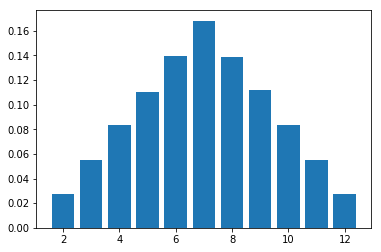

In [125]:
N = 100000
M = defaultdict(int)

for i in range(N):
    M[random.randint(1, 6) + random.randint(1, 6)] += 1

p = {n: v / N for n, v in M.items()}

import matplotlib.pyplot as plt
plt.figure()
plt.bar(p.keys(), p.values())
plt.show()

In [130]:
print("  n | Computed [%] | Exact [%] |        Error ")
print("----+--------------+-----------+--------------")
exact = {k: v / 36 * 100 for k, v in {2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 5, 9: 4, 10: 3, 11: 2, 12: 1}.items()}
for n in sorted(p):
    print(f" {n:2} | {p[n] * 100:12.6f} | {exact[n]:9.6f} | {abs(p[n]*100 - exact[n]):12.6e} ")

  n | Computed [%] | Exact [%] |        Error 
----+--------------+-----------+--------------
  2 |     2.772000 |  2.777778 | 5.777778e-03 
  3 |     5.519000 |  5.555556 | 3.655556e-02 
  4 |     8.328000 |  8.333333 | 5.333333e-03 
  5 |    11.041000 | 11.111111 | 7.011111e-02 
  6 |    13.949000 | 13.888889 | 6.011111e-02 
  7 |    16.804000 | 16.666667 | 1.373333e-01 
  8 |    13.850000 | 13.888889 | 3.888889e-02 
  9 |    11.173000 | 11.111111 | 6.188889e-02 
 10 |     8.314000 |  8.333333 | 1.933333e-02 
 11 |     5.505000 |  5.555556 | 5.055556e-02 
 12 |     2.745000 |  2.777778 | 3.277778e-02 


# Exercise 8.16: Vectorize flipping a coin

In [2]:
import numpy as np

N = 10000
tails = np.sum(np.random.randint(2, size=N))    # tails = 1
tails

4952

# Exercise 8.17: Vectorize a probablility computation

In [138]:
for N in [1, 10, 1000, 1000000]:
    M = sum(0.5 <= random.random() < 0.6 for i in range(N))
    p = M / N
    print(f"N = {N:4.0e}: p = {p:f}")

N = 1e+00: p = 0.000000
N = 1e+01: p = 0.100000
N = 1e+03: p = 0.094000
N = 1e+06: p = 0.100008


In [140]:
for N in [1, 10, 1000, 1000000]:
    r = np.random.rand(N)
    M = np.sum((0.5 < r) & (r <= 0.6))
    print(f"N = {N:4.0e}: p = {M/N:f}")

N = 1e+00: p = 1.000000
N = 1e+01: p = 0.200000
N = 1e+03: p = 0.120000
N = 1e+06: p = 0.100028


# Exercise 8.18: Throw dice and compute a small probability

In [18]:
N = 10000000
M = np.sum(np.sum(np.random.randint(1, 7, 7*N).reshape(7, -1), axis=0) == 7*6)
print(f"The probability is approximately {M / N * 100:f}%")

The probability is approximately 0.000400%


# Exercise 8.19: Is democracy reliable as a decision maker?

In [82]:
def homogeneous(p, N):
    votes = np.random.rand(N) < p
    return np.sum(votes) > N/2

def homogeneous_ex():
    print("       N |    p |             Results ")
    print("---------+------+---------------------")
    for N in 5, 1000000:
        for p in 0.49, 0.51, 0.8:
            print(f" {N:7d} | {p:4.2f} | ", end="")
            for i in range(10):
                print("%d " % int(homogenous(p, N)), end="")
            print()

homogeneous_ex()

       N |    p |             Results 
---------+------+---------------------
       5 | 0.49 | 0 1 0 1 0 1 1 1 1 0 
       5 | 0.51 | 1 0 1 0 1 1 0 0 1 1 
       5 | 0.80 | 1 1 1 1 1 1 1 1 1 1 
 1000000 | 0.49 | 0 0 0 0 0 0 0 0 0 0 
 1000000 | 0.51 | 1 1 1 1 1 1 1 1 1 1 
 1000000 | 0.80 | 1 1 1 1 1 1 1 1 1 1 


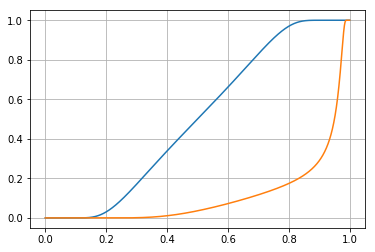

In [119]:
from scipy.stats import norm
import matplotlib.pyplot as plt

p = np.linspace(1e-6, 1 - 1e-6, 10000)
plt.figure()
plt.grid()
# population
plt.plot(p, 1 - norm.cdf(1000000/2, loc= 1000000 * p, scale= 1000000 * p * (1 - p)))
# king
plt.plot(p, 1 - norm.cdf(0.95, loc=p, scale= p * (1 - p)))    # have 95% of all questions right (-> almost 100% competence)
plt.show()